# **Assignment 3**

### In this Assignment we are going to run a CNN model on top of MNIST data to reach an accuracy of 99.4% and we are going to analyze the result. 
#### NOTE: We can only use 3 × 3 conv, 1 × 1 conv, maxpooling layer, dropout and batch normalization using at most 20k parameter 

### So to achieve the goal lets fist install keras library with which we are goinf to build the model.

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Let's import all importent pakages from keras with which we are going to build the CNN model

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

from keras.datasets import mnist

### Now we are going to load the pre-shuffled MNIST data. Out of total 70k data we have 60k hand written image as train data and 10k hand written image as test data which is autometically predefined in mnist dataset.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Let's see how our MNIST data looks like in below. Here we can see the 5th hand written digit in X_train as 2 in the displayed image.

(60000, 28, 28)


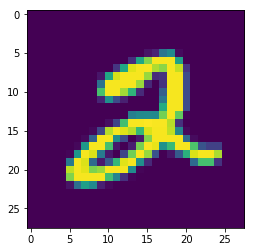

In [31]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

### Now we have to shape all the image size in test and train so that we can apply out CNN model based on the input image shape and we will not have any problem while testing with test images with same shape. Let's shape train and test data to (28 , 28 , 1) which is going to be the input dimension of our model.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Here in the below section we are going to scale our pixel values to 0-1 as grey scale pixel lies between 0-255. So to train a robust we must scale the pixcel values.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Let's see how Y looks like as Y values are the actual no corrosponding to an hand written image.

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Now we have to convert Y values from 1-dimentional class matrix to 10 dimentional class matrix so that we can predict out of 10 class which class it is predicting.

In [34]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Now let's build our CNN model which we are going to apply on our train data for training the model later. Here we are using 2-D convolution, maxpooling, dropout and batch normalization layers and softmax activation function to get output.

In [21]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update 

### Here in the model summary we can see that out total no of model parameter is 19.6k which is less than 20k. So, we are good to go from no of parameters point of view.

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 16)        2320      
__________

### Lets's compile the model with adam optimizer ,loss as cross entropy and validation matrix as accuracy:

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Let's train the model with training data and let's see how much training accuracy we get after training completion. Here we have used batch size as 64 and total no of epoch 55 to train the model.

In [24]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=55, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/55
60000/60000 [==============================] - 15s 254us/step - loss: 0.6355 - acc: 0.8101
Epoch 2/55
60000/60000 [==============================] - 14s 226us/step - loss: 0.1342 - acc: 0.9616
Epoch 3/55
60000/60000 [==============================] - 13s 219us/step - loss: 0.0936 - acc: 0.9722
Epoch 4/55
60000/60000 [==============================] - 13s 218us/step - loss: 0.0784 - acc: 0.9762
Epoch 5/55
60000/60000 [==============================] - 13s 218us/step - loss: 0.0708 - acc: 0.9786
Epoch 6/55
60000/60000 [==============================] - 13s 218us/step - loss: 0.0657 - acc: 0.9800
Epoch 7/55
60000/60000 [==============================] - 14s 225us/step - loss: 0.0599 - acc: 0.9826
Epoch 8/55
60000/60000 [==============================] - 14s 229us/step - loss: 0.0583 - acc: 0.9821
Epoch 9/55
60000/60000 [==============================] - 14s 230us/step - loss: 0.0543 - acc: 0.9837
Epoch 10/55
60000/60000 [==============================] - 14s 229us/step - loss: 

### As, we can see we have got training accuracy as 99.24% which is pretty less than 99.4. May be caused due to adding dropout in each layer. Though it does not imply that our test accuracy gonna be less than that. So now let's apply the model on test data to check test accuracy:

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019006871725752716, 0.9943]


### Voila, we can see in the abobe that we have achieve the 99.43% test accuracy. 

### Now, if we predict output class Y in test data we will get the prediction result which we can compare with test result. Let's compare test and train result:

In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[8.5192062e-07 2.5031509e-06 1.9050015e-06 8.5192062e-07 8.5192062e-07
  8.5192062e-07 8.5192062e-07 9.9998701e-01 8.5192062e-07 3.5159776e-06]
 [2.5809288e-05 2.0641276e-04 9.9911660e-01 2.5809288e-05 4.8442100e-05
  2.5809288e-05 4.7361836e-04 2.5809288e-05 2.5809288e-05 2.5809288e-05]
 [2.8357351e-07 9.9999511e-01 2.8357351e-07 2.8357351e-07 6.2929740e-07
  2.8357351e-07 2.8357351e-07 2.2092556e-06 2.8357351e-07 2.8357351e-07]
 [9.9890828e-01 5.5261385e-06 5.5261385e-06 5.5261385e-06 5.5261385e-06
  5.5261385e-06 1.0451635e-03 5.5261385e-06 7.9327401e-06 5.5261385e-06]
 [1.2437558e-06 1.0801189e-06 1.0801189e-06 1.0801189e-06 9.9996388e-01
  1.4412295e-06 5.3634903e-06 1.0801189e-06 1.0801189e-06 2.2691125e-05]
 [2.8196823e-07 9.9999249e-01 2.8196823e-07 2.8196823e-07 1.4735750e-06
  2.8196823e-07 2.8196823e-07 4.0617274e-06 2.8196823e-07 2.8196823e-07]
 [9.7196344e-06 9.7196344e-06 9.7196344e-06 9.7196344e-06 9.9830794e-01
  9.7196344e-06 9.7196344e-06 4.7037544e-04 9.8005858e-06 

### In the above y_pred we can see that in 1st row 8th positional value is 9.9998701e-01 which is grater than all other values in that row. So, we can say for the 1st test image output is 8th positional value i.e. 7. And in the y_test we can actually validate that we have predicted correctly for the 1st image.

### Now lets see at the time of training our model what kind of kernals we have used in different layers to extract different features like texture, pattern, parts of object and object.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

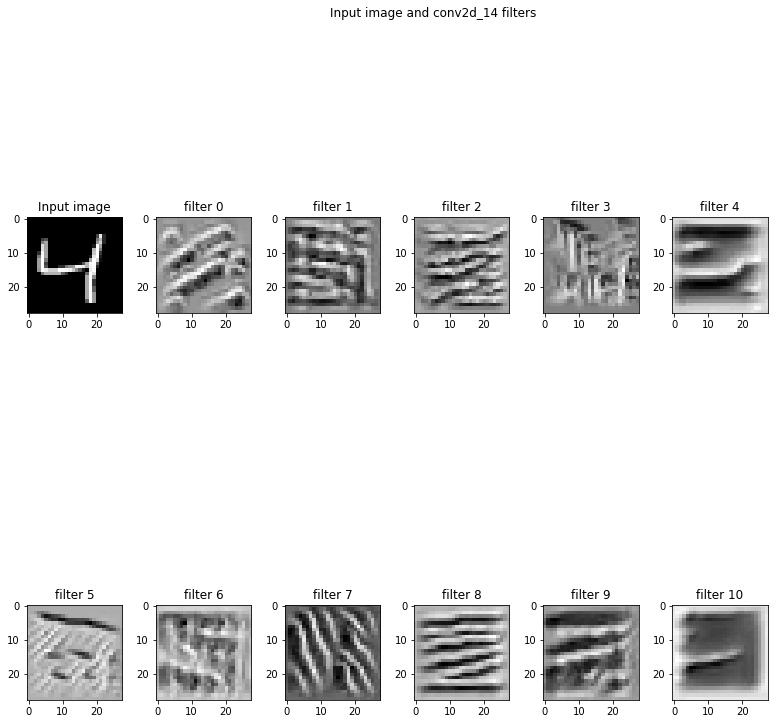

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

### So, In the above we can see all 10 filter used in different layers to extract features of our hand written digit 4.